In [1]:
import os
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision 
import pathlib
from pathlib import Path

C:\Users\test\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


$\Large\text{Data load}$

In [44]:
path_folder = 'TOP4040/'

In [45]:
folder = Path(path_folder)

In [46]:
data = np.load(path_folder + '2.npz')['arr_0']

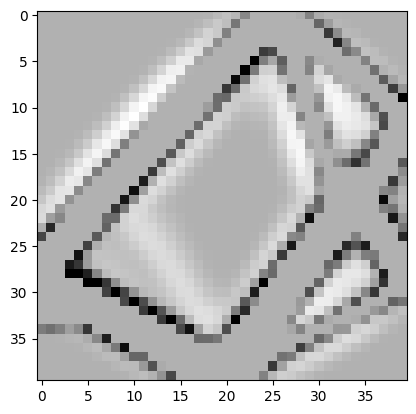

In [47]:
plt.imshow(data[5]- data[4], cmap='Greys')

$\Large\text{Examples of tensor usage}$

In [48]:
x = torch.rand(6,6)
x

tensor([[0.4170, 0.4107, 0.4169, 0.2012, 0.0810, 0.2210],
        [0.5420, 0.4035, 0.0050, 0.3338, 0.2235, 0.5151],
        [0.9495, 0.7054, 0.2852, 0.2877, 0.1544, 0.9993],
        [0.4466, 0.9035, 0.3396, 0.2613, 0.2937, 0.4192],
        [0.5246, 0.1647, 0.7999, 0.6973, 0.3944, 0.5764],
        [0.6293, 0.9210, 0.9091, 0.6689, 0.3378, 0.2247]])

In [49]:
x.view(36)

tensor([0.4170, 0.4107, 0.4169, 0.2012, 0.0810, 0.2210, 0.5420, 0.4035, 0.0050,
        0.3338, 0.2235, 0.5151, 0.9495, 0.7054, 0.2852, 0.2877, 0.1544, 0.9993,
        0.4466, 0.9035, 0.3396, 0.2613, 0.2937, 0.4192, 0.5246, 0.1647, 0.7999,
        0.6973, 0.3944, 0.5764, 0.6293, 0.9210, 0.9091, 0.6689, 0.3378, 0.2247])

In [50]:
x.view(3,12)

tensor([[0.4170, 0.4107, 0.4169, 0.2012, 0.0810, 0.2210, 0.5420, 0.4035, 0.0050,
         0.3338, 0.2235, 0.5151],
        [0.9495, 0.7054, 0.2852, 0.2877, 0.1544, 0.9993, 0.4466, 0.9035, 0.3396,
         0.2613, 0.2937, 0.4192],
        [0.5246, 0.1647, 0.7999, 0.6973, 0.3944, 0.5764, 0.6293, 0.9210, 0.9091,
         0.6689, 0.3378, 0.2247]])

In [51]:
x.view(-1, 12) # -1 , python automatically calculate the size

tensor([[0.4170, 0.4107, 0.4169, 0.2012, 0.0810, 0.2210, 0.5420, 0.4035, 0.0050,
         0.3338, 0.2235, 0.5151],
        [0.9495, 0.7054, 0.2852, 0.2877, 0.1544, 0.9993, 0.4466, 0.9035, 0.3396,
         0.2613, 0.2937, 0.4192],
        [0.5246, 0.1647, 0.7999, 0.6973, 0.3944, 0.5764, 0.6293, 0.9210, 0.9091,
         0.6689, 0.3378, 0.2247]])

In [52]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [53]:
b = a.numpy() #have to write copy(), otherwise they are stored at the same memory
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [54]:
c = a.numpy().copy() #have to write copy(), otherwise they are stored at the same memory and whenever you change the value in a it is also changed in b
c

array([1., 1., 1., 1., 1.], dtype=float32)

In [55]:
a.add_(5)
a

tensor([6., 6., 6., 6., 6.])

In [56]:
b

array([6., 6., 6., 6., 6.], dtype=float32)

In [57]:
c

array([1., 1., 1., 1., 1.], dtype=float32)

In [58]:
x = torch.ones(5, requires_grad = True)
x # it says to tensor that later it requires to calculate the gradients for this tensor in optimization steps

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [59]:
type(x[0].item())

float

$\Large\text{Gradient calculation with autograd}$

In [88]:
x = torch.randn(3, requires_grad = True)
x

tensor([1.3984, 0.8894, 0.0342], requires_grad=True)

In [89]:
y = x + 2
y

tensor([3.3984, 2.8894, 2.0342], grad_fn=<AddBackward0>)

In [90]:
z = y**2*2
# z = z.mean()

In [91]:
# z.backward() #dz/dx
# print(x.grad)

In [92]:
# What if we dont specify z = z.mean()
v = torch.tensor([0.1, 1.0, 0.001], dtype = torch.float32)
z.backward(v) # in the backward it is vector jacobian product
print(x.grad) 

tensor([1.3594e+00, 1.1557e+01, 8.1369e-03])


In [93]:
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad():

In [96]:
x.requires_grad_(False) # Whenever our function has _ at the end it means that is modified our variable inplace
x # Now x does not have requires_grad=True
# The same will be with y = x.detach()
# with torch.no_grad():
#    y = x + 2 

tensor([1.3984, 0.8894, 0.0342])

$\text{Whenever we call backward function then the gradient for this tensor will be accumulated into the dot grad attribute, the values will be summed up}$ 

In [97]:
weights = torch.ones(4 , requires_grad=True)

$\text{Before we do the next iteration or optimiztion we must empty the gradients}$

In [103]:
for epoch in range(4):
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)
    
    weights.grad.zero_() # Empty 

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [104]:
#With optimization

# optimizer = torch.optim.SGD(weights, lr=0.01)
# optimizer.step()
# optimizer.zero_grad()